# HW6.

by Handan Cetin | USCID: 6074572947 | github: handancetin

*Note*: I am aware the submission is 1 day late. I request to use late day policy to not get 10% penalty for my late submission. Thank you!

In [1]:
import os
import csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as skM
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import LeaveOneOut, GridSearchCV, StratifiedKFold, KFold
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore') # for plots

## 1. Tree-Based Methods

### 1.(a) Download the APS Failure data
from: https://archive.ics.uci.edu/ml/datasets/APS+Failure+at+Scania+Trucks 

The dataset contains a training set and a test set. The training set contains 60,000 rows, of which 1,000 belong to the positive class and 171 columns, of which one is the class column. All attributes are numeric.

In [2]:
# Read the data, first 20 rows are descriptive
trainingSet = pd.read_csv('../data/aps_failure_training_set.csv', sep = ',', na_values = ['na'], skiprows = 19)
testingSet  = pd.read_csv('../data/aps_failure_test_set.csv', sep = ',', na_values = ['na'], skiprows = 19)
trainingSet

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,NaN,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,neg,2286,NaN,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,neg,112,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,neg,80292,NaN,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [3]:
testingSet

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0.0,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82,0.0,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002,2.0,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816,NaN,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814,NaN,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852,NaN,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,neg,18,0.0,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,neg,79636,NaN,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,neg,110,NaN,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


In [4]:
# First column is the class value, split the data
trainingTarget   = trainingSet.iloc[:, 0:1]
trainingFeatures = trainingSet.iloc[:, 1:]

testingTarget    = testingSet.iloc[:, 0:1]
testingFeatures  = testingSet.iloc[:, 1:]

### 1.(b) Data Preparation

#### 1.(a)i. Research what types of techniques are usually used for dealing with data with missing values.
Pick at least one of them and apply it to this data in the next steps.

We have several options in terms of data imputation:
* We can fill in the missing values with estimated values from the same column; either with mean, median, or mode values could work.
* We can set up a regression model to estimate those missing values.
* We can estimate missing values using KNN, choosing the values of the nearest neighbors.

I will replace the missing data with the estimated mean from the existing data for that feature. sklearn provides a built-in imputer for this job.

In [5]:
trainingFeatures = pd.DataFrame(SimpleImputer(missing_values = pd.NA, strategy = 'mean').fit(trainingFeatures).transform(trainingFeatures))
trainingFeatures.columns = trainingSet.columns[1:]
trainingFeatures

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698.0,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058.0,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040.0,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12.0,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874.0,0.713189,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,153002.0,0.713189,6.640000e+02,186.000000,0.0,0.0,0.0,0.0,0.0,2564.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,2286.0,0.713189,2.130707e+09,224.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,112.0,0.000000,2.130706e+09,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,80292.0,0.713189,2.130706e+09,494.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [6]:
testingFeatures = pd.DataFrame(SimpleImputer(missing_values = pd.NA, strategy = 'mean').fit(testingFeatures).transform(testingFeatures))
testingFeatures.columns = testingSet.columns[1:]
testingFeatures

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,60.0,0.000000,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,2682.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,82.0,0.000000,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,66002.0,2.000000,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,199486.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,59816.0,0.772065,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,1814.0,0.772065,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,81852.0,0.772065,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,18.0,0.000000,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,79636.0,0.772065,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,110.0,0.772065,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


#### 1.(a)ii. For each of the 170 features, calculate the coeﬃcient of variation CV = s/m
where s is sample standard deviation and m is sample mean.

In [7]:
trainingDesc = trainingFeatures.describe()
trainingCV = trainingDesc.loc['std'] / trainingDesc.loc['mean']
for col in trainingCV.index:
    print(col, '=', round(trainingCV[col], 4))

aa_000 = 2.4509
ab_000 = 2.3284
ac_000 = 2.1698
ad_000 = 183.8476
ae_000 = 23.1909
af_000 = 18.6589
ag_000 = 91.8786
ag_001 = 34.855
ag_002 = 17.3691
ag_003 = 8.55
ag_004 = 5.4015
ag_005 = 2.9271
ag_006 = 2.3449
ag_007 = 2.8335
ag_008 = 6.1546
ag_009 = 32.9844
ah_000 = 2.3002
ai_000 = 18.0127
aj_000 = 43.8018
ak_000 = 74.5267
al_000 = 9.0744
am_0 = 9.0587
an_000 = 2.2388
ao_000 = 2.2601
ap_000 = 3.0592
aq_000 = 2.8396
ar_000 = 10.837
as_000 = 86.4169
at_000 = 23.4594
au_000 = 68.1606
av_000 = 5.7788
ax_000 = 3.8776
ay_000 = 37.0096
ay_001 = 52.2339
ay_002 = 38.8096
ay_003 = 28.4135
ay_004 = 33.3747
ay_005 = 12.3841
ay_006 = 3.0231
ay_007 = 3.2842
ay_008 = 3.7756
ay_009 = 83.7861
az_000 = 9.3283
az_001 = 7.6464
az_002 = 13.1417
az_003 = 7.446
az_004 = 2.8171
az_005 = 3.0081
az_006 = 8.7809
az_007 = 16.0476
az_008 = 22.4258
az_009 = 76.968
ba_000 = 2.6831
ba_001 = 2.6087
ba_002 = 2.8788
ba_003 = 2.7161
ba_004 = 2.616
ba_005 = 2.6799
ba_006 = 3.0073
ba_007 = 2.8104
ba_008 = 6.7515
ba_009 

#### 1.(a)iii. Plot a correlation matrix for your features using pandas or any other tool

In [8]:
corr = trainingFeatures.corr()
corr.style.background_gradient(cmap = 'coolwarm')

#### 1.(a)iv. Pick floor(√170) features with highest CV, and make scatter plots and box plots for them 
similar to those on p. 129 of ISLR. Can you draw conclusions about signiﬁcance of those features, just by the scatter plots? This does not mean that you will only use those features in the following questions. We picked them only for visualization.

In [9]:
# Sort the features by CVs and pick top floor(√170)
trainingCV = trainingCV.sort_values(ascending = False)
topCoeffvars = trainingCV.index[0:np.floor(170 ** 0.5).astype(int)]
topCoeffvars

Index(['cs_009', 'cf_000', 'co_000', 'ad_000', 'dh_000', 'dj_000', 'ag_000',
       'as_000', 'ay_009', 'az_009', 'ak_000', 'au_000', 'ch_000'],
      dtype='object')

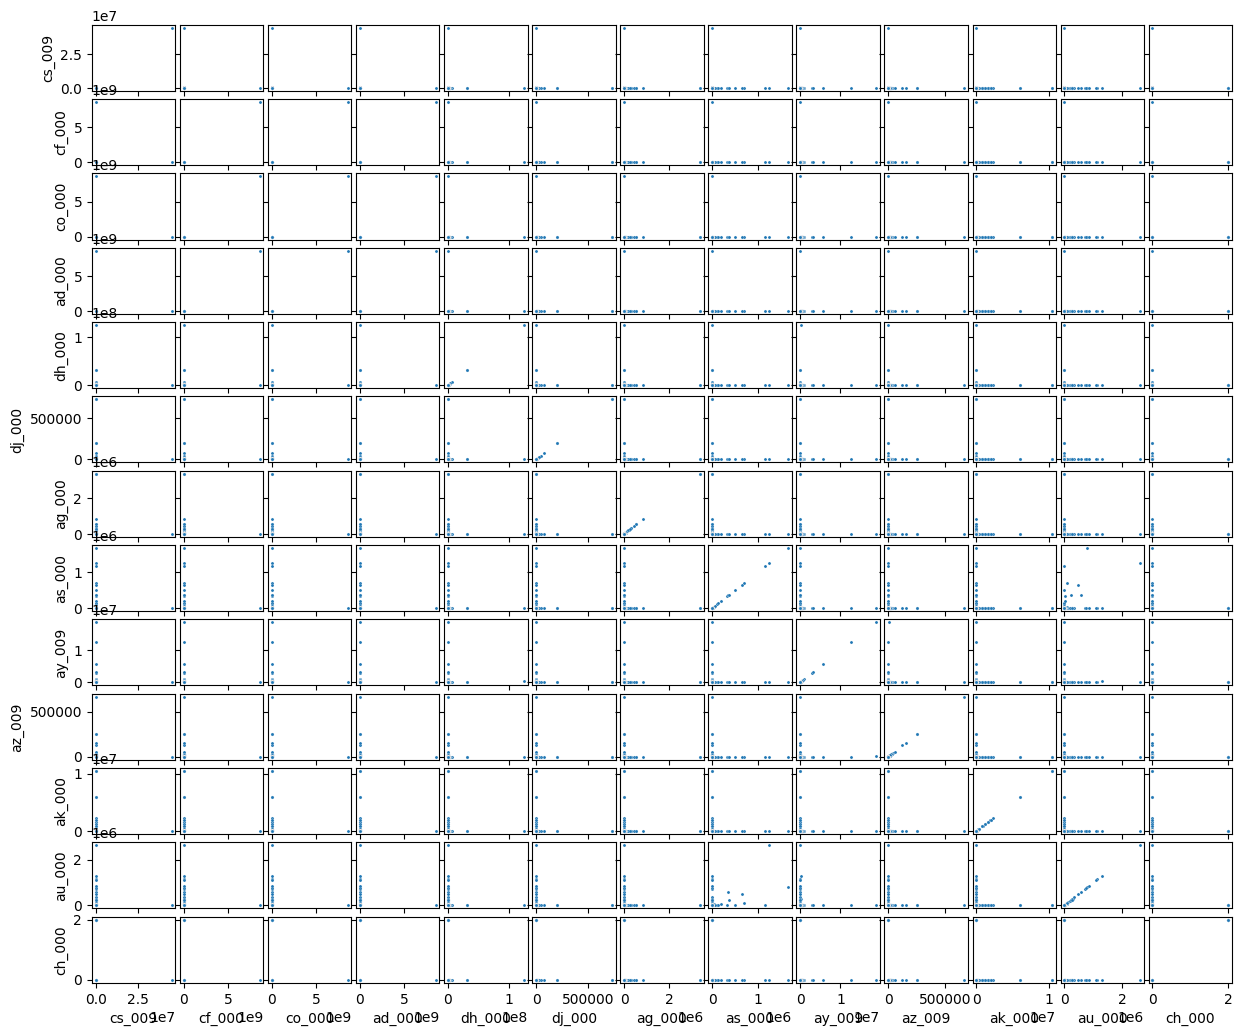

In [10]:
# Scatter plots 
p = sns.pairplot(data = trainingFeatures[topCoeffvars], kind = 'scatter', 
                 diag_kind = None, grid_kws={'despine' : False}, plot_kws={'s': 5})
p.fig.set_size_inches(12,10)

[None]

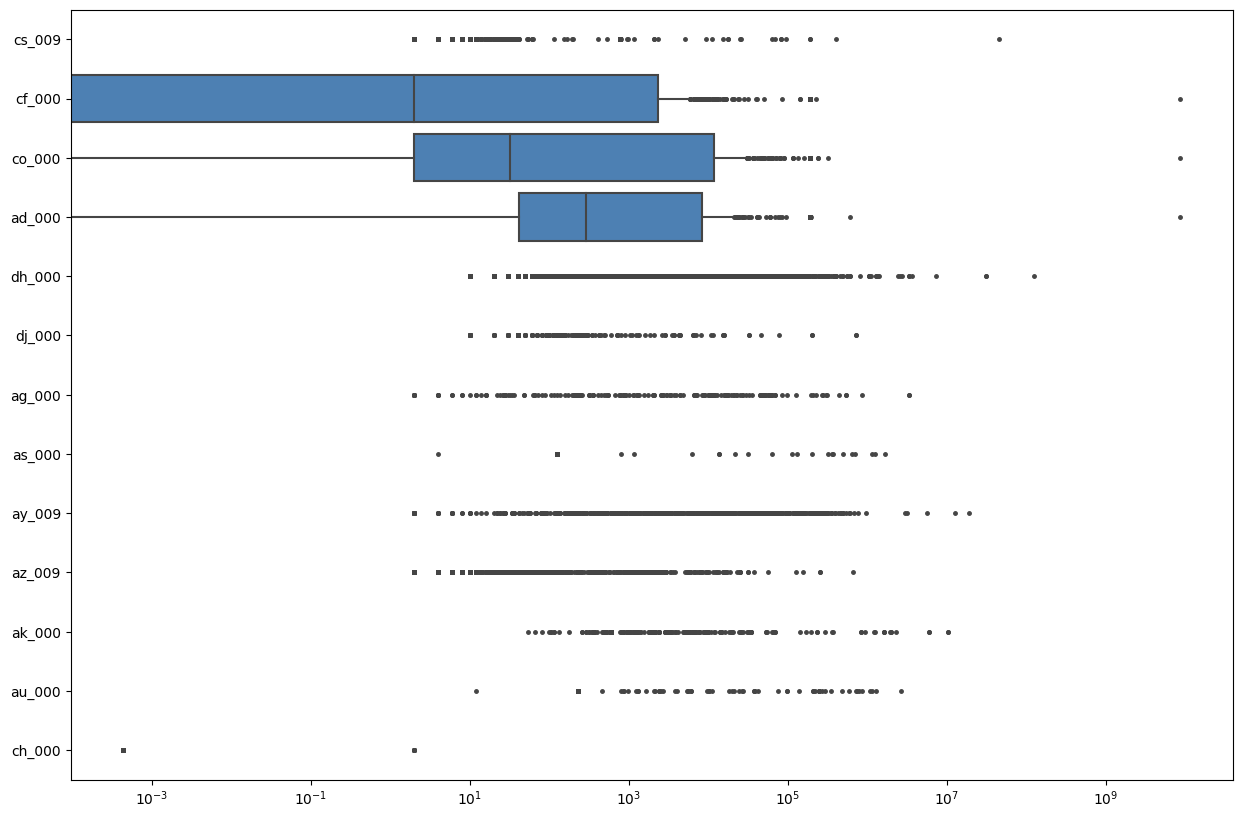

In [11]:
# Box plots
fig = plt.figure(figsize = (15, 10))
p = sns.boxplot(data = trainingFeatures[topCoeffvars], showcaps = False, orient='h',
                flierprops = {"marker": "."}, boxprops = {"facecolor": (.3, .5, .7)})
p.set(xscale='log') # is added because of outliers dominating the boxes

We can't draw any conclusions about significance of the features.

#### 1.(a)v. Determine the number of positive and negative data. 
Is this data set imbalanced?

In [12]:
trainingTarget.value_counts()

class
neg      59000
pos       1000
dtype: int64

In [13]:
testingTarget.value_counts()

class
neg      15625
pos        375
dtype: int64

Yes, the data is highly imbalanced.

### 1.(c) Train a random forest to classify the data set. 
Do NOT compensate for class imbalance in the data set. Calculate the confusion matrix, ROC, AUC, and misclassiﬁcation for training and test sets and report them (You may use pROC package). Calculate Out of Bag error estimate for your random forset and compare it to the test error.

Confusion matrix for the training set is:
 [[59000     0]
 [    1   999]]
Accuracy for the training set is: 0.9999833333333333
Area under ROC is: 1.0


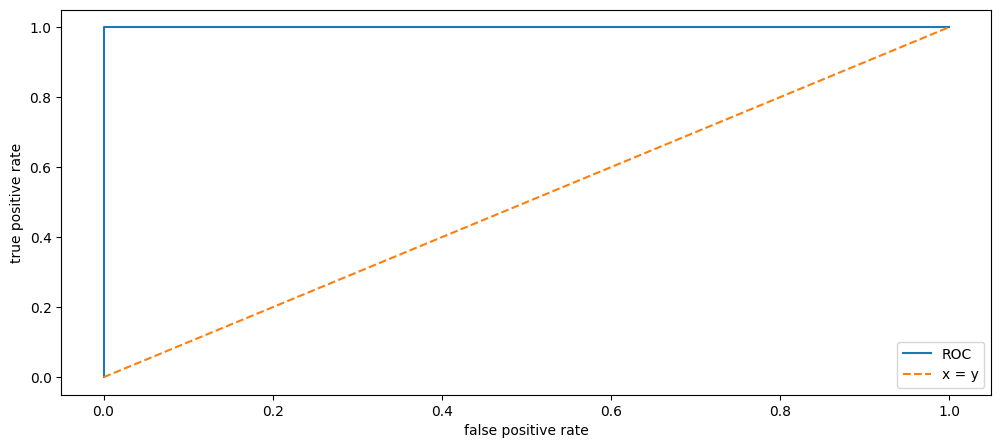

In [14]:
# Random Forest Classification on the TRAINING Set
modelRandomForest = RandomForestClassifier(oob_score = True).fit(trainingFeatures, trainingTarget)
trainingPredicted = modelRandomForest.predict(trainingFeatures)
trainingPredictedProba = modelRandomForest.predict_proba(trainingFeatures)

# Confusion Matrix
trainingConfMatrix = skM.confusion_matrix(trainingTarget, trainingPredicted)
print('Confusion matrix for the training set is:\n', trainingConfMatrix)

# Accuracy
trainingAccuracy = skM.accuracy_score(trainingTarget, trainingPredicted)
print('Accuracy for the training set is:', trainingAccuracy)

# ROC
trainingROCFPR, trainingROCTPR, trainingROCThreshold = skM.roc_curve(trainingTarget, 
                                                                     trainingPredictedProba[:, 1], 
                                                                     pos_label = 'pos')

# AUC
trainingAUC = skM.roc_auc_score(trainingTarget, trainingPredictedProba[:, 1])
print('Area under ROC is:', trainingAUC)

# Plot
fig, axes = plt.subplots(figsize=(12, 5))
axes.plot(trainingROCFPR, trainingROCTPR, label='ROC')
axes.plot([0, 1], [0, 1], "--", label='x = y')
axes.set_xlabel("false positive rate")
axes.set_ylabel("true positive rate")
axes.legend()
plt.show()

Confusion matrix for the testing set is:
 [[15606    19]
 [  104   271]]
Accuracy for the testing set is: 0.9923125
Area under ROC is: 0.9938456746666666


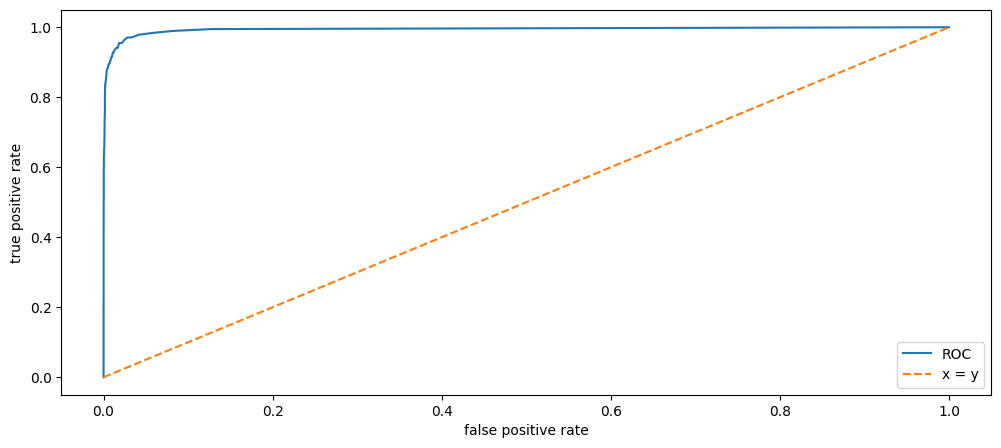

In [15]:
# Random Forest Classification on the TESTING Set
testingPredicted = modelRandomForest.predict(testingFeatures)
testingPredictedProba = modelRandomForest.predict_proba(testingFeatures)

# Confusion Matrix
testingConfMatrix = skM.confusion_matrix(testingTarget, testingPredicted)
print('Confusion matrix for the testing set is:\n', testingConfMatrix)

# Accuracy
testingAccuracy = skM.accuracy_score(testingTarget, testingPredicted)
print('Accuracy for the testing set is:', testingAccuracy)

# ROC
testingROCFPR, testingROCTPR, testingROCThreshold = skM.roc_curve(testingTarget, 
                                                                  testingPredictedProba[:, 1], 
                                                                  pos_label = 'pos')

# AUC
testingAUC = skM.roc_auc_score(testingTarget, testingPredictedProba[:, 1])
print('Area under ROC is:', testingAUC)

# Plot
fig, axes = plt.subplots(figsize=(12, 5))
axes.plot(testingROCFPR, testingROCTPR, label='ROC')
axes.plot([0, 1], [0, 1], "--", label='x = y')
axes.set_xlabel("false positive rate")
axes.set_ylabel("true positive rate")
axes.legend()
plt.show()

In [16]:
# Out of Bag Score
OOBScore = modelRandomForest.oob_score_
print('OOB score is:', OOBScore)

OOB score is: 0.9937


In [17]:
print('Test error is',  np.round(1 - testingAccuracy, 4), 'while the OOB error is', np.round(1 - OOBScore, 4))

Test error is 0.0077 while the OOB error is 0.0063


### 1.(d) Research how class imbalance is addressed in random forests. 
Compensate for class imbalance in your random forest and repeat 1c. Compare the results with those of 1

Few options can be applied to address imbalance issues:
* We can perform oversampling or undersampling to balance the data set
* We can design weighted random forests with different weights assigned to imbalanced classes 
* We can generate synthetic data to add more minority class data

I will use weighted random forests as RandomForestClassifier performs this with a parameter input.

Confusion matrix for the training set is:
 [[59000     0]
 [    0  1000]]
Accuracy for the training set is: 1.0
Area under ROC is: 0.9999999999999999


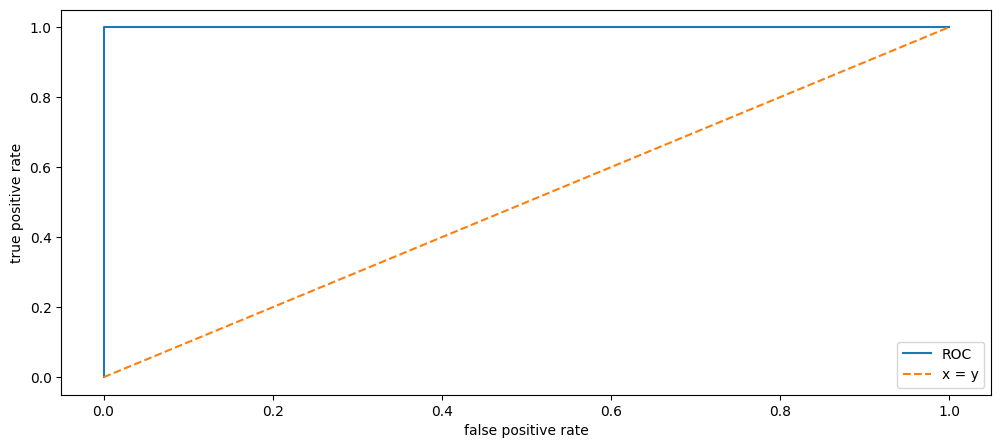

In [18]:
# BALANCED Random Forest Classification on the TRAINING Set
modelRandomForest = RandomForestClassifier(class_weight = 'balanced', oob_score = True).fit(trainingFeatures, trainingTarget)
trainingPredicted = modelRandomForest.predict(trainingFeatures)
trainingPredictedProba = modelRandomForest.predict_proba(trainingFeatures)

# Confusion Matrix
trainingConfMatrix = skM.confusion_matrix(trainingTarget, trainingPredicted)
print('Confusion matrix for the training set is:\n', trainingConfMatrix)

# Accuracy
trainingAccuracy = skM.accuracy_score(trainingTarget, trainingPredicted)
print('Accuracy for the training set is:', trainingAccuracy)

# ROC
trainingROCFPR, trainingROCTPR, trainingROCThreshold = skM.roc_curve(trainingTarget, trainingPredictedProba[:, 1], pos_label = 'pos')

# AUC
trainingAUC = skM.roc_auc_score(trainingTarget, trainingPredictedProba[:, 1])
print('Area under ROC is:', trainingAUC)

# Plot
fig, axes = plt.subplots(figsize=(12, 5))
axes.plot(trainingROCFPR, trainingROCTPR, label='ROC')
axes.plot([0, 1], [0, 1], "--", label='x = y')
axes.set_xlabel("false positive rate")
axes.set_ylabel("true positive rate")
axes.legend()
plt.show()

Confusion matrix for the testing set is:
 [[15611    14]
 [  165   210]]
Accuracy for the testing set is: 0.9888125
Area under ROC is: 0.9912794453333333


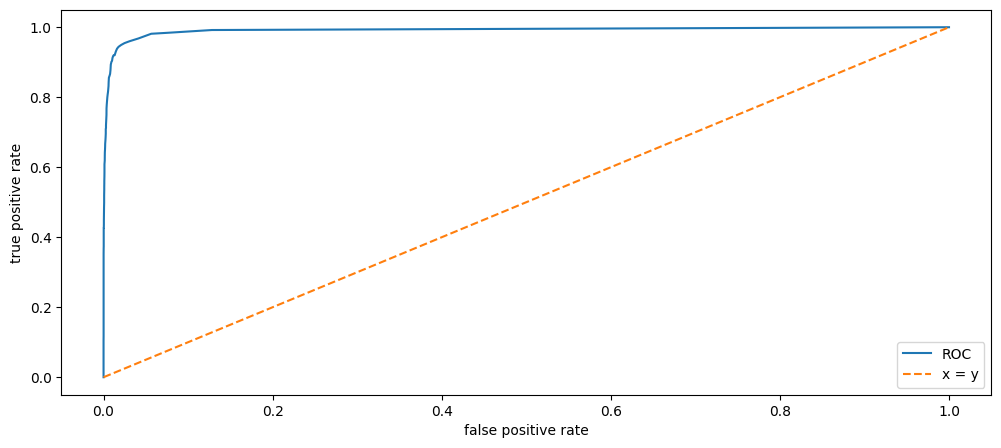

In [19]:
# BALANCED Random Forest Classification on the TESTING Set
testingPredicted = modelRandomForest.predict(testingFeatures)
testingPredictedProba = modelRandomForest.predict_proba(testingFeatures)

# Confusion Matrix
testingConfMatrix = skM.confusion_matrix(testingTarget, testingPredicted)
print('Confusion matrix for the testing set is:\n', testingConfMatrix)

# Accuracy
testingAccuracy = skM.accuracy_score(testingTarget, testingPredicted)
print('Accuracy for the testing set is:', testingAccuracy)

# ROC
testingROCFPR, testingROCTPR, testingROCThreshold = skM.roc_curve(testingTarget, testingPredictedProba[:, 1], pos_label = 'pos')

# AUC
testingAUC = skM.roc_auc_score(testingTarget, testingPredictedProba[:, 1])
print('Area under ROC is:', testingAUC)

# Plot
fig, axes = plt.subplots(figsize=(12, 5))
axes.plot(testingROCFPR, testingROCTPR, label='ROC')
axes.plot([0, 1], [0, 1], "--", label='x = y')
axes.set_xlabel("false positive rate")
axes.set_ylabel("true positive rate")
axes.legend()
plt.show()

The imbalanced version showed higher accuracy on the predictions. This can be explained by a skewed class distribution, skewed in favor of the majority class which results higher accuracy in the predictions. This behaivor of the model can be observed by comparing the confusion matrices.



### 1.(e) XGBoost and Model Trees
In the case of a univariate tree, only one input dimension is used at a tree split. In a multivariate tree, or model tree, at a decision node all input dimensions can be used and thus it is more general. In univariate classiﬁcation trees, majority polling is used at each node to determine the split of that node as the decision rule. 

In model trees, a (linear) model that relies on all of the variables is used to determine the split of that node (i.e. instead of using Xj > s as the decision rule, one has ∑ j βj Xj > s. as the decision rule). Alternatively, in a regression tree, instead of using average in the region associated with each node, a linear regression model is used to determine the value associated with that node.

One of the methods that can be used at each node is Logistic Regression. Because the number of variables is large in this problem, one can use L1-penalized logistic regression at each node. You can use XGBoost to ﬁt the model tree. 

Determine α (the regularization term) using cross-validation. Train the model for the APS data set without compensation for class imbalance. Use one of 5 fold, 10 fold, and leave-one-out cross validation methods to estimate the error of your trained model and compare it with the test error. Report the Confusion Matrix, ROC, and AUC for training and test sets.

In [20]:
# Convert to binary
trainingTarget['class'].replace({'neg': 0, 'pos': 1}, inplace = True)
testingTarget['class'].replace({'neg': 0, 'pos': 1}, inplace = True) 

# Find the optimum alpha using 5-fold CV
classifier = XGBClassifier(objective = 'binary:logistic')
kfold = KFold(n_splits = 5,shuffle = True, random_state = 123)
parameters = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1, 10, 100, 1000]}
gridSearch = GridSearchCV(classifier, parameters, cv = kfold, scoring = 'accuracy')
gridSearch.fit(trainingFeatures, trainingTarget)

print('The best alpha is found as', gridSearch.best_params_['alpha'], 'with the accuracy of', np.round(gridSearch.best_score_,4))

The best alpha is found as 0.5 with the accuracy of 0.9947


In [21]:
# Use the best alpha
classifier = XGBClassifier(objective='binary:logistic', reg_alpha = gridSearch.best_params_['alpha'])
classifier.fit(trainingFeatures, trainingTarget)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Confusion matrix for the training set is:
 [[59000     0]
 [    1   999]]
Accuracy for the training set is: 0.9999833333333333
Area under ROC is: 0.9999984067796611


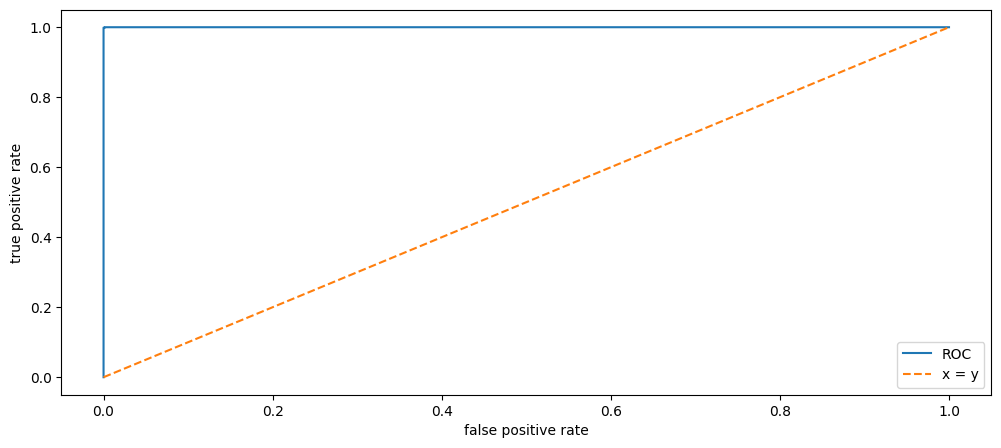

In [22]:
# Training Set Prediction
trainingPredicted = classifier.predict(trainingFeatures)
trainingPredictedProba = classifier.predict_proba(trainingFeatures)

# Confusion Matrix
trainingConfMatrix = skM.confusion_matrix(trainingTarget, trainingPredicted)
print('Confusion matrix for the training set is:\n', trainingConfMatrix)

# Accuracy
trainingAccuracy = skM.accuracy_score(trainingTarget, trainingPredicted)
print('Accuracy for the training set is:', trainingAccuracy)

# ROC
trainingROCFPR, trainingROCTPR, trainingROCThreshold = skM.roc_curve(trainingTarget, 
                                                                     trainingPredictedProba[:, 1])

# AUC
trainingAUC = skM.roc_auc_score(trainingTarget, trainingPredictedProba[:, 1])
print('Area under ROC is:', trainingAUC)

# Plot
fig, axes = plt.subplots(figsize=(12, 5))
axes.plot(trainingROCFPR, trainingROCTPR, label='ROC')
axes.plot([0, 1], [0, 1], "--", label='x = y')
axes.set_xlabel("false positive rate")
axes.set_ylabel("true positive rate")
axes.legend()
plt.show()

Confusion matrix for the testing set is:
 [[15609    16]
 [   78   297]]
Accuracy for the testing set is: 0.994125
Area under ROC is: 0.9953565013333333


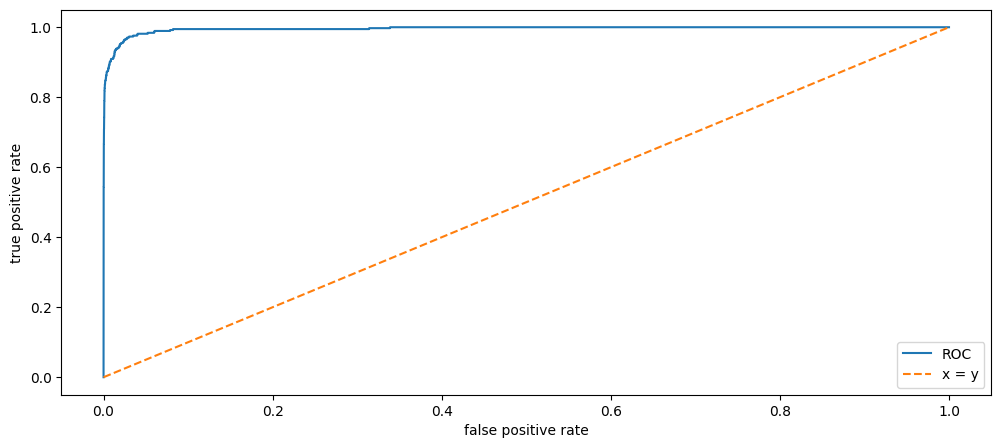

In [23]:
# Testing Set Prediction
testingPredicted = classifier.predict(testingFeatures)
testingPredictedProba = classifier.predict_proba(testingFeatures)

# Confusion Matrix
testingConfMatrix = skM.confusion_matrix(testingTarget, testingPredicted)
print('Confusion matrix for the testing set is:\n', testingConfMatrix)

# Accuracy
testingAccuracy = skM.accuracy_score(testingTarget, testingPredicted)
print('Accuracy for the testing set is:', testingAccuracy)

# ROC
testingROCFPR, testingROCTPR, testingROCThreshold = skM.roc_curve(testingTarget, testingPredictedProba[:, 1])

# AUC
testingAUC = skM.roc_auc_score(testingTarget, testingPredictedProba[:, 1])
print('Area under ROC is:', testingAUC)

# Plot
fig, axes = plt.subplots(figsize=(12, 5))
axes.plot(testingROCFPR, testingROCTPR, label='ROC')
axes.plot([0, 1], [0, 1], "--", label='x = y')
axes.set_xlabel("false positive rate")
axes.set_ylabel("true positive rate")
axes.legend()
plt.show()

### 1.(f) Use SMOTE (Synthetic Minority Over-sampling Technique)
to pre-process your data to compensate for class imbalance. Train XGBosst with L1-penalized logistic regression at each node using the pre-processed data and repeat 1e. Do not forget that there is a right and a wrong way of cross validation here. Compare the uncompensated case with SMOTE case.

In [24]:
# SMOTE for class imbalance
trainingFeaturesSMOTE, trainingTargetSMOTE = SMOTE().fit_resample(trainingFeatures, trainingTarget)

In [25]:
# Repeating 1e

# Find the optimum alpha using 5-fold CV
classifier = XGBClassifier(objective = 'binary:logistic')
kfold = KFold(n_splits = 5,shuffle = True, random_state = 123)
parameters = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1, 10, 100, 1000]}
gridSearch = GridSearchCV(classifier, parameters, cv = kfold, scoring = 'accuracy')
gridSearch.fit(trainingFeaturesSMOTE, trainingTargetSMOTE)

print('The best alpha is found as', gridSearch.best_params_['alpha'], 'with the accuracy of', np.round(gridSearch.best_score_, 4))

# Use the best alpha
classifier = XGBClassifier(objective='binary:logistic', reg_alpha = gridSearch.best_params_['alpha'])
classifier.fit(trainingFeaturesSMOTE, trainingTargetSMOTE)

The best alpha is found as 0.1 with the accuracy of 0.9979


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Confusion matrix for the training set is:
 [[59000     0]
 [    1 58999]]
Accuracy for the training set is: 0.9999915254237288
Area under ROC is: 0.9999999982763573


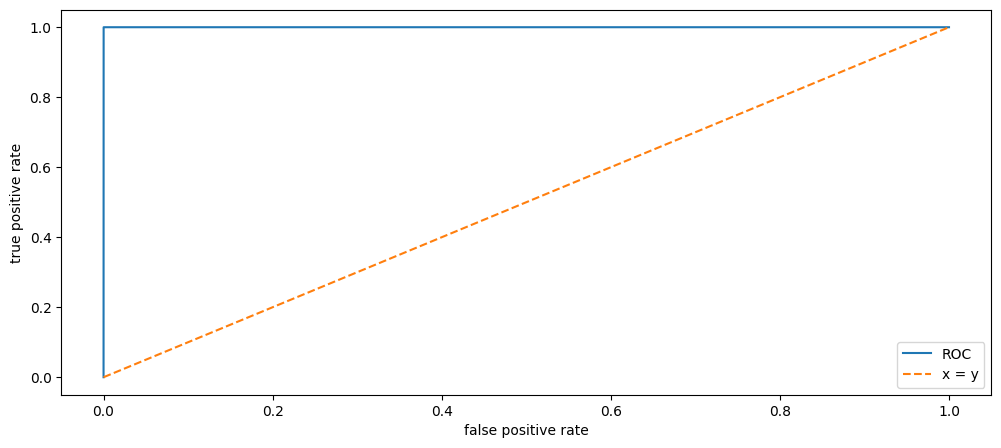

In [26]:
# Training Set Predictions after SMOTE
trainingPredicted = classifier.predict(trainingFeaturesSMOTE)
trainingPredictedProba = classifier.predict_proba(trainingFeaturesSMOTE)

# Confusion Matrix
trainingConfMatrix = skM.confusion_matrix(trainingTargetSMOTE, trainingPredicted)
print('Confusion matrix for the training set is:\n', trainingConfMatrix)

# Accuracy
trainingAccuracy = skM.accuracy_score(trainingTargetSMOTE, trainingPredicted)
print('Accuracy for the training set is:', trainingAccuracy)

# ROC
trainingROCFPR, trainingROCTPR, trainingROCThreshold = skM.roc_curve(trainingTargetSMOTE, 
                                                                     trainingPredictedProba[:, 1])

# AUC
trainingAUC = skM.roc_auc_score(trainingTargetSMOTE, trainingPredictedProba[:, 1])
print('Area under ROC is:', trainingAUC)

# Plot
fig, axes = plt.subplots(figsize=(12, 5))
axes.plot(trainingROCFPR, trainingROCTPR, label='ROC')
axes.plot([0, 1], [0, 1], "--", label='x = y')
axes.set_xlabel("false positive rate")
axes.set_ylabel("true positive rate")
axes.legend()
plt.show()

Confusion matrix for the testing set is:
 [[15418   207]
 [   54   321]]
Accuracy for the testing set is: 0.9836875
Area under ROC is: 0.9904320853333333


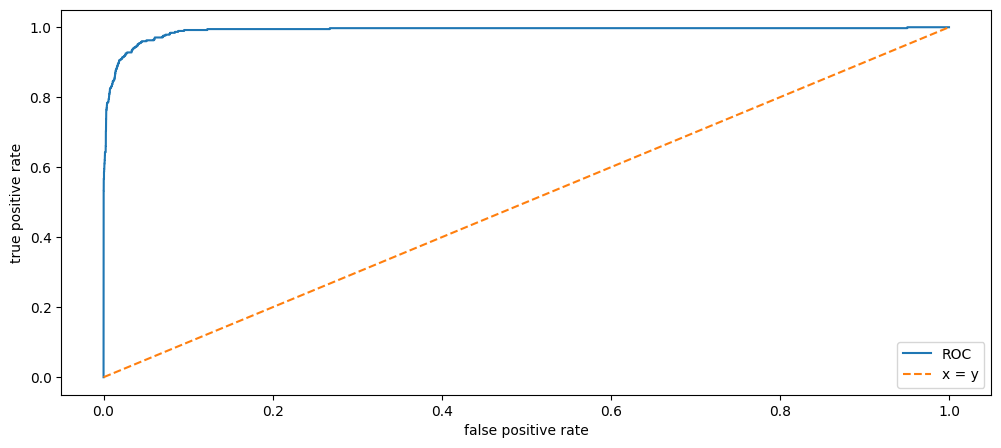

In [27]:
# Testing Set Prediction after SMOTE
testingPredicted = classifier.predict(testingFeatures)
testingPredictedProba = classifier.predict_proba(testingFeatures)

# Confusion Matrix
testingConfMatrix = skM.confusion_matrix(testingTarget, testingPredicted)
print('Confusion matrix for the testing set is:\n', testingConfMatrix)

# Accuracy
testingAccuracy = skM.accuracy_score(testingTarget, testingPredicted)
print('Accuracy for the testing set is:', testingAccuracy)

# ROC
testingROCFPR, testingROCTPR, testingROCThreshold = skM.roc_curve(testingTarget, testingPredictedProba[:, 1])

# AUC
testingAUC = skM.roc_auc_score(testingTarget, testingPredictedProba[:, 1])
print('Area under ROC is:', testingAUC)

# Plot
fig, axes = plt.subplots(figsize=(12, 5))
axes.plot(testingROCFPR, testingROCTPR, label='ROC')
axes.plot([0, 1], [0, 1], "--", label='x = y')
axes.set_xlabel("false positive rate")
axes.set_ylabel("true positive rate")
axes.legend()
plt.show()

Alpha value is the same for both imbalanced and SMOTE-balanced data sets. Accuracy is higher before the balancing  of the data.

## 2. ISLR 6.6.3

![Answer ISLR 6.6.3](ISLR_663.jpg)

## 3. ISLR 6.6.5

![Answer ISLR 6.6.5](ISLR_665.jpg)

## 4. ISLR 8.4.5

![Answer ISLR 8.4.5](ISLR_845.jpg)

## 5. ISLR 9.7.3

![Answer ISLR 9.7.3](ISLR_973.jpg)